<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

### Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [75]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### DATA PRE-PROCESSING

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [78]:
df_cleaned = df.drop(columns=["show_id", "title", "description"])


In [79]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   director      5398 non-null   object
 2   cast          7069 non-null   object
 3   country       7280 non-null   object
 4   date_added    7777 non-null   object
 5   release_year  7787 non-null   int64 
 6   rating        7780 non-null   object
 7   duration      7787 non-null   object
 8   listed_in     7787 non-null   object
dtypes: int64(1), object(8)
memory usage: 547.6+ KB


In [80]:
# Filling missing values

categorical_cols = ["director", "cast", "country", "date_added", "rating"]
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna("Unknown")

In [81]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   director      7787 non-null   object
 2   cast          7787 non-null   object
 3   country       7787 non-null   object
 4   date_added    7787 non-null   object
 5   release_year  7787 non-null   int64 
 6   rating        7787 non-null   object
 7   duration      7787 non-null   object
 8   listed_in     7787 non-null   object
dtypes: int64(1), object(8)
memory usage: 547.6+ KB


In [82]:
# Convert duration to numerical values
import numpy as np


def convert_duration(value):
    if isinstance(value, str):
        if "Season" in value:
            return int(value.split()[0]) * 60  # Convert seasons to minutes
        elif "min" in value:
            return int(value.split()[0])  # Extract minute values
    return np.nan

df_cleaned["duration"] = df_cleaned["duration"].apply(convert_duration)
df_cleaned["duration"].fillna(df_cleaned["duration"].median(), inplace=True)  # Filling missing duration values


<ipython-input-82-7aaad63e170b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["duration"].fillna(df_cleaned["duration"].median(), inplace=True)  # Filling missing duration values


In [83]:
# Extract individual genres from `listed_in` column
df_cleaned["listed_in"] = df_cleaned["listed_in"].fillna("Unknown")
unique_genres = set(genre.strip() for sublist in df_cleaned["listed_in"].dropna().str.split(",") for genre in sublist)
for genre in unique_genres:
    df_cleaned[genre] = df_cleaned["listed_in"].str.contains(genre, case=False, na=False).astype(int)

# Drop categorical text columns and `listed_in`
df_cleaned.drop(columns=["director", "cast", "date_added", "listed_in"], inplace=True)

In [84]:
# Encode categorical variables

from sklearn.calibration import LabelEncoder


df_cleaned["type"] = df_cleaned["type"].map({"Movie": 0, "TV Show": 1})
label_encoder = LabelEncoder()
df_cleaned["rating"] = label_encoder.fit_transform(df_cleaned["rating"])
df_cleaned["country"] = label_encoder.fit_transform(df_cleaned["country"])

In [85]:
df_cleaned.isnull().sum()

type                            0
country                         0
release_year                    0
rating                          0
duration                        0
Romantic TV Shows               0
Anime Series                    0
Documentaries                   0
Comedies                        0
TV Shows                        0
Horror Movies                   0
Faith & Spirituality            0
Sci-Fi & Fantasy                0
Thrillers                       0
TV Action & Adventure           0
Independent Movies              0
TV Thrillers                    0
International Movies            0
LGBTQ Movies                    0
Docuseries                      0
Action & Adventure              0
Science & Nature TV             0
Korean TV Shows                 0
Stand-Up Comedy                 0
Stand-Up Comedy & Talk Shows    0
TV Sci-Fi & Fantasy             0
Kids' TV                        0
Dramas                          0
Children & Family Movies        0
TV Horror     

### 1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [86]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

In [87]:
# Apply PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=20)
pca_result = pca.fit_transform(df_scaled)


### 2. Create a scree plot for each principal component

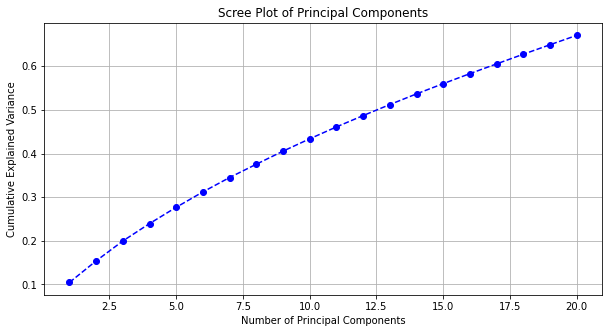

In [88]:
# Scree plot for PCA variance
from matplotlib import pyplot as plt


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Determine optimal components
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1

# Apply PCA with optimal components
pca_optimal = PCA(n_components=optimal_components)
pca_result_optimal = pca_optimal.fit_transform(df_scaled)

# Create a Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot of Principal Components")
plt.grid(True)
plt.show()

### 3. Use any clustering algorithm to create clusters

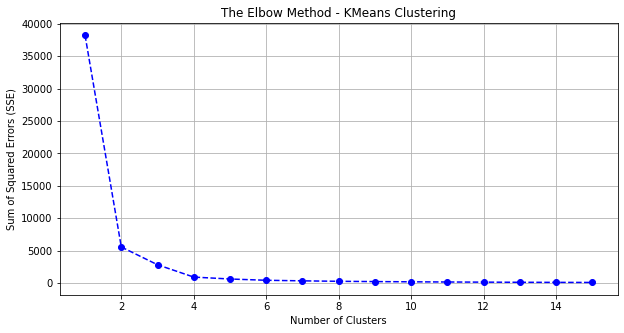

In [89]:
# Compute SSE (Sum of Squared Errors) for different cluster sizes
from sklearn.cluster import KMeans
SSE = []

for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(pca_result_optimal)
    SSE.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 16), SSE, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


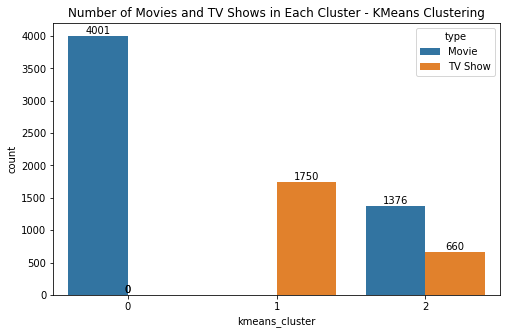

In [90]:
import seaborn as sns

# Apply K-Means clustering with K=4 (chosen from the Elbow Method)
final_k = 3
kmeans = KMeans(n_clusters=final_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(pca_result_optimal)

# Add K-Means cluster labels to the dataset
df['kmeans_cluster'] = kmeans.labels_

plt.figure(figsize=(8, 5))
graph = sns.countplot(x='kmeans_cluster', data=df, hue='type')
plt.title("Number of Movies and TV Shows in Each Cluster - KMeans Clustering")

for p in graph.patches:
    graph.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


#### cluster 0

In [91]:
df[df["kmeans_cluster"] == 0].head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,kmeans_cluster
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",0
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",0


#### cluster 1

In [92]:
df[df["kmeans_cluster"] == 1].head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,kmeans_cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,1
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",1


#### cluster 2

In [93]:
df[df["kmeans_cluster"] == 2].head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,kmeans_cluster
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,2
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",2
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,2


#### 4. Profile each cluster that you have generated based on your experiments


--- Cluster 0 Profile ---

Movie Percentage: 100.00%
TV Show Percentage: 0.00%

Top 5 Genres:
listed_in
International Movies        2437
Dramas                      1830
Comedies                    1289
Independent Movies           673
Children & Family Movies     532
Name: count, dtype: int64

Top 5 Release Years:
release_year
2018    513
2017    499
2016    448
2019    412
2020    298
Name: count, dtype: int64


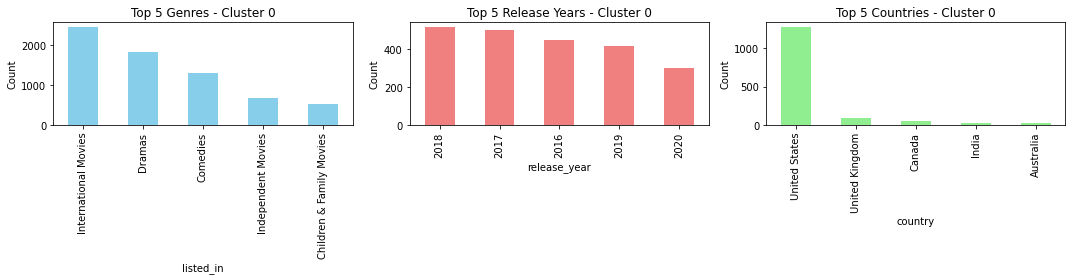


--- Cluster 1 Profile ---

Movie Percentage: 0.00%
TV Show Percentage: 100.00%

Top 5 Genres:
listed_in
International TV Shows    1199
TV Dramas                  657
Crime TV Shows             427
Romantic TV Shows          333
TV Comedies                332
Name: count, dtype: int64

Top 5 Release Years:
release_year
2020    330
2019    310
2018    283
2017    189
2016    185
Name: count, dtype: int64


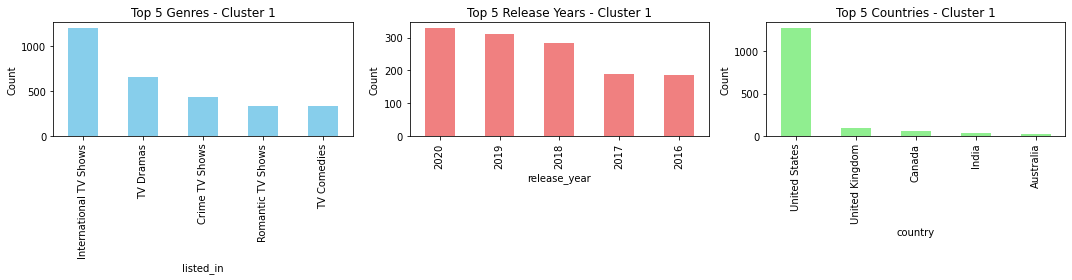


--- Cluster 2 Profile ---

Movie Percentage: 67.58%
TV Show Percentage: 32.42%

Top 5 Genres:
listed_in
Documentaries         389
Stand-Up Comedy       329
Kids' TV              311
Dramas                276
Action & Adventure    230
Name: count, dtype: int64

Top 5 Release Years:
release_year
2018    325
2017    324
2019    274
2016    249
2020    240
Name: count, dtype: int64


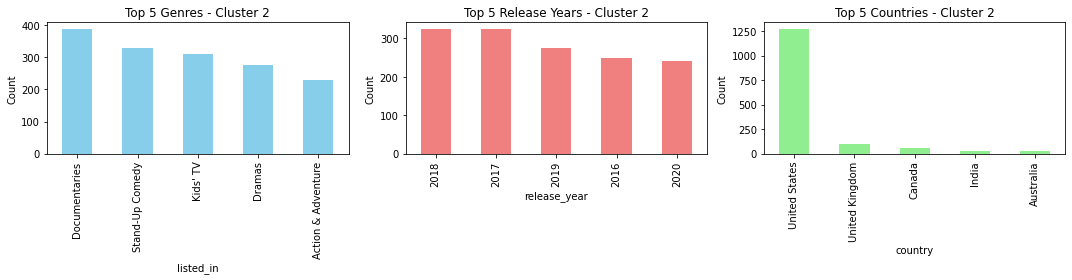

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

clusters = sorted(df["kmeans_cluster"].unique())  # Sort clusters in ascending order

# Iterate through each cluster in sorted order
for cluster in clusters:
    df_cluster = df[df["kmeans_cluster"] == cluster]
    print(f"\n--- Cluster {cluster} Profile ---\n")
    
    # 1. Movie vs. TV Show distribution
    type_counts = df_cluster["type"].value_counts(normalize=True) * 100
    print(f"Movie Percentage: {type_counts.get('Movie', 0):.2f}%")
    print(f"TV Show Percentage: {type_counts.get('TV Show', 0):.2f}%")

    # 2. Top 5 Genres
    top_genres = df_cluster["listed_in"].str.split(",").explode().str.strip().value_counts().head(5)
    print("\nTop 5 Genres:")
    print(top_genres)

    # 3. Top 5 Release Years
    top_years = df_cluster["release_year"].value_counts().head(5)
    print("\nTop 5 Release Years:")
    print(top_years)

    # Visualization for each cluster
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Genre Distribution
    top_genres.plot(kind="bar", color="skyblue", ax=axes[0])
    axes[0].set_title(f"Top 5 Genres - Cluster {cluster}")
    axes[0].set_ylabel("Count")

    # Release Year Distribution
    top_years.plot(kind="bar", color="lightcoral", ax=axes[1])
    axes[1].set_title(f"Top 5 Release Years - Cluster {cluster}")
    axes[1].set_ylabel("Count")

    # Country Distribution
    top_countries.plot(kind="bar", color="lightgreen", ax=axes[2])
    axes[2].set_title(f"Top 5 Countries - Cluster {cluster}")
    axes[2].set_ylabel("Count")

    plt.tight_layout()
    plt.show()
